# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
from citipy import citipy
import math
import numpy as np
import random
import sys
sys.path.append('../')
from api_keys import weather_api_key
import requests
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
import json
 

## Generate Cities List

In [22]:
#Create a list out of all the dictionary of coordinates : city object
city = citipy.WORLD_CITIES_DICT
#print(city[(40.7683333, -74.1458333)])

#Create list out of coordinate tuples that are keys to citipy dictionary
CityCoordinates = list(city.keys())


#print(len(CityCoordinates))
#CityCoordinates
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
#Variable to limit the number of API calls I can make at any one time so that my API key doesn't get locked again...
NumberOfCities = 20
#Essentially shuffle and shorten list to length of x
CityCoordinates = random.sample(CityCoordinates,NumberOfCities)
units = "imperial"

lat = 59.334591
lon = 18.063240


#print(len(CityCoordinates))
weather_data = {}
#url = f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units={units}"
#response = requests.get(url).json()
#print(f"{currentcity.city_name},{currentcity.country_code} the weather is: {response['main']['temp']}")
responses = []
for i in CityCoordinates:
    lat = i[0]
    lon = i[-1]
    currentcity = citipy.nearest_city(lat,lon)
    
    country = currentcity.country_code 
    url = f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units={units}"
    response = requests.get(url).json()
     
    print(f"{currentcity.city_name}, {country} the weather is: {response['main']['temp']}")
    location = f"{currentcity.city_name}, {country}"
    weather_data[location] = response['main']['temp']
    responses.append(response)

weather_data

highland park, us the weather is: 46.69
puerto montt, cl the weather is: 55.4
west memphis, us the weather is: 56.46
stanita, ro the weather is: 47.03
turtkul, uz the weather is: 50.18
aumbay, ph the weather is: 75.2
saedinenie, bg the weather is: 50.83
guaiuba, br the weather is: 81.68
favara, it the weather is: 57.99
chahuites, mx the weather is: 81.81
sasovo, ru the weather is: 43.52
dubove, ua the weather is: 46.18
motca, ro the weather is: 44.96
deir hanna, il the weather is: 68
richmond, us the weather is: 50.97
baleshwar, in the weather is: 74.61
tomra, no the weather is: 45.12
kresttsy, ru the weather is: 43.39
zevio, it the weather is: 53.53
swords, ie the weather is: 42.93


{'highland park, us': 46.69,
 'puerto montt, cl': 55.4,
 'west memphis, us': 56.46,
 'stanita, ro': 47.03,
 'turtkul, uz': 50.18,
 'aumbay, ph': 75.2,
 'saedinenie, bg': 50.83,
 'guaiuba, br': 81.68,
 'favara, it': 57.99,
 'chahuites, mx': 81.81,
 'sasovo, ru': 43.52,
 'dubove, ua': 46.18,
 'motca, ro': 44.96,
 'deir hanna, il': 68,
 'richmond, us': 50.97,
 'baleshwar, in': 74.61,
 'tomra, no': 45.12,
 'kresttsy, ru': 43.39,
 'zevio, it': 53.53,
 'swords, ie': 42.93}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#weather_data
humidities = []
latitudes = []
longitudes = []
wind_speeds = []
cloudiness = []
for i in responses:
    
    humidities.append(i['main']['humidity'])
    latitudes.append(i['coord']['lat'])
    longitudes.append(i['coord']['lon'])
    wind_speeds.append(i['wind']['speed'])
    cloudiness.append(i['clouds']['all'])
    #print(json.dumps(i, indent = 1)) 


weather_df = pd.DataFrame(columns=['Temperature','Locations', 'Humidity', 'Latitude', 
                        'Longitude','Wind Speed', 'Cloudiness'])
weather_df["Temperature"] = weather_data.values()
weather_df["Locations"] = weather_data.keys()
weather_df["Humidity"] = humidities
weather_df["Latitude"] = latitudes
weather_df["Longitude"] = longitudes
weather_df["Wind Speed"] = wind_speeds
weather_df["Cloudiness"] = cloudiness
weather_df

,Temperature,Locations,Humidity,Latitude,Longitude,Wind Speed,Cloudiness
0,46.69,"highland park, us",36,42.41,-83.10,19.46,75
1,55.40,"puerto montt, cl",82,-41.47,-72.94,9.17,90
2,56.46,"west memphis, us",26,35.15,-90.18,3.36,1
3,47.03,"stanita, ro",76,47.02,27.10,2.24,0
4,50.18,"turtkul, uz",39,41.55,61.00,7.16,0
5,75.20,"aumbay, ph",94,7.10,125.78,3.36,75
6,50.83,"saedinenie, bg",76,42.27,24.55,4.70,75
7,81.68,"guaiuba, br",74,-4.03,-38.63,14.99,0
8,57.99,"favara, it",100,37.32,13.65,1.99,0
9,81.81,"chahuites, mx",58,16.28,-94.18,19.28,61


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
#  Get the indices of cities that have humidity over 100%.
indexes = []
current = 0
for i in responses:
    
    #print(f"The humidity is: {i['main']['humidity']}")
    if i['main']['humidity'] > 100:
        indexes.append(current)
        current+=1
        
indexes  

[]

In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df = weather_df.drop(indexes)
weather_df

,Temperature,Locations,Humidity,Latitude,Longitude,Wind Speed,Cloudiness
0,46.69,"highland park, us",36,42.41,-83.10,19.46,75
1,55.40,"puerto montt, cl",82,-41.47,-72.94,9.17,90
2,56.46,"west memphis, us",26,35.15,-90.18,3.36,1
3,47.03,"stanita, ro",76,47.02,27.10,2.24,0
4,50.18,"turtkul, uz",39,41.55,61.00,7.16,0
5,75.20,"aumbay, ph",94,7.10,125.78,3.36,75
6,50.83,"saedinenie, bg",76,42.27,24.55,4.70,75
7,81.68,"guaiuba, br",74,-4.03,-38.63,14.99,0
8,57.99,"favara, it",100,37.32,13.65,1.99,0
9,81.81,"chahuites, mx",58,16.28,-94.18,19.28,61


In [27]:
weather_df.to_csv('weather.csv') 


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

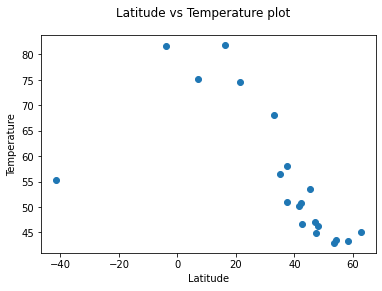

In [28]:
plt.scatter(weather_df['Latitude'],weather_df['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.suptitle("Latitude vs Temperature plot")
plt.savefig("LatTempScatter.png")
plt.show()

## Latitude vs. Humidity Plot

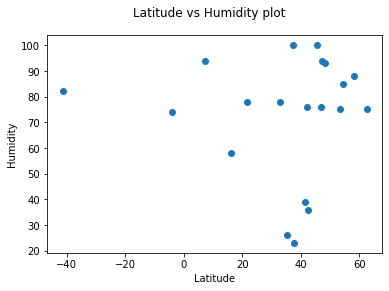

In [29]:
plt.scatter(weather_df['Latitude'],weather_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.suptitle("Latitude vs Humidity plot")
plt.savefig("LatHumidityScatter.png")
plt.show()

## Latitude vs. Cloudiness Plot

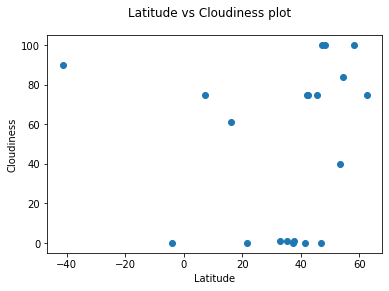

In [30]:
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.suptitle("Latitude vs Cloudiness plot")
plt.savefig("LatCloudinessScatter.png")
plt.show()

## Latitude vs. Wind Speed Plot

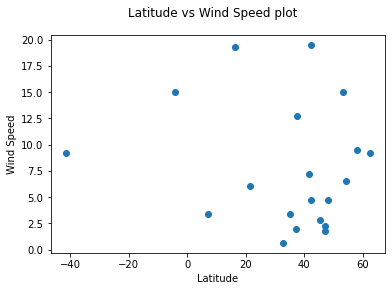

In [31]:
plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.suptitle("Latitude vs Wind Speed plot")
plt.savefig("LatWindSpeedScatter.png")
plt.show()

## Linear Regression

In [32]:
#df.loc[df['shield'] > 35] = 0

NorthernHemisphere = weather_df['Latitude'].loc[weather_df['Latitude'] >= 0]
NorthernIndexes = NorthernHemisphere.index

SouthernHemisphere = weather_df['Latitude'].loc[weather_df['Latitude'] < 0]
SouthernIndexes = SouthernHemisphere.index


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0     48.896354
2     38.372453
3     48.530118
4     45.137049
5     18.186383
6     44.436892
8     36.724391
9     11.066323
10    52.310967
11    49.445709
12    50.759850
13    25.941970
14    44.286089
15    18.821910
16    50.587503
17    52.450999
18    41.528546
19    52.946494
Name: Temperature, dtype: float64
y = -1.08x +99.19


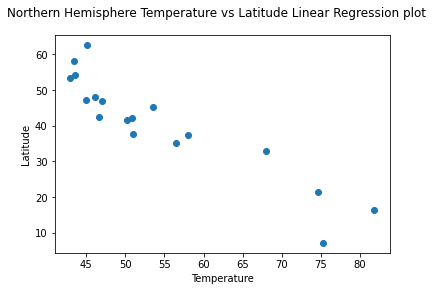

In [33]:
plt.scatter(weather_df['Temperature'][NorthernIndexes],weather_df['Latitude'][NorthernIndexes])
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.suptitle("Northern Hemisphere Temperature vs Latitude Linear Regression plot")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_df['Temperature'][NorthernIndexes], 
                                            weather_df['Latitude'][NorthernIndexes])


regress_values = weather_df['Temperature'][NorthernIndexes] * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 1.42x +-120.4
<class 'pandas.core.indexes.numeric.Int64Index'>


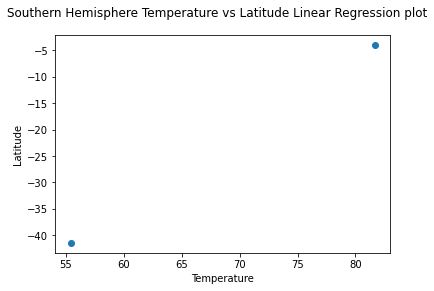

In [34]:
plt.scatter(weather_df['Temperature'][SouthernIndexes],weather_df['Latitude'][SouthernIndexes])
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.suptitle("Southern Hemisphere Temperature vs Latitude Linear Regression plot")


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_df['Temperature'][SouthernIndexes], 
                                            weather_df['Latitude'][SouthernIndexes])

 



if math.isnan(slope):
    equation1 = str(weather_df['Temperature'][SouthernIndexes])
    equation1 = equation1.split(" ")
    print(equation1)
    print(f"x = {equation1[4]}")
else:
    regress_values = weather_df['Temperature'][SouthernIndexes] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)
 
print(type(weather_df['Temperature'][SouthernIndexes].index))
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0     38.244696
2     37.594147
3     40.846892
4     38.439860
5     42.017881
6     40.846892
8     42.408210
9     39.675904
10    41.432387
11    41.952826
12    42.017881
13    40.977002
14    37.398982
15    40.977002
16    40.781838
17    41.627551
18    42.408210
19    40.781838
Name: Humidity, dtype: float64
y = 0.07x +35.9


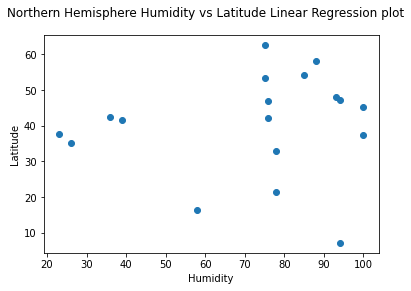

In [35]:
plt.scatter(weather_df['Humidity'][NorthernIndexes],weather_df['Latitude'][NorthernIndexes])
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.suptitle("Northern Hemisphere Humidity vs Latitude Linear Regression plot")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_df['Humidity'][NorthernIndexes], 
                                            weather_df['Latitude'][NorthernIndexes])

regress_values = weather_df['Humidity'][NorthernIndexes] * slope + intercept
print(regress_values)


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


print(line_eq)

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -4.68x +342.29


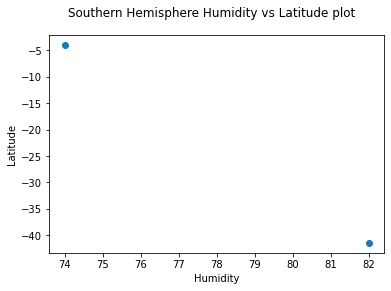

In [36]:
plt.scatter(weather_df['Humidity'][SouthernIndexes],weather_df['Latitude'][SouthernIndexes])
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.suptitle("Southern Hemisphere Humidity vs Latitude plot")


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_df['Humidity'][SouthernIndexes], 
                                            weather_df['Latitude'][SouthernIndexes])





if math.isnan(slope):
    equation2 = str(weather_df['Temperature'][SouthernIndexes])
    equation2 = equation2.split(" ")
    print(equation2)
    print(f"x = {equation2[4]}")
else:
    regress_values = weather_df['Temperature'][SouthernIndexes] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0     43.485843
2     35.536514
3     35.429091
4     35.429091
5     43.485843
6     43.485843
8     35.429091
9     41.981916
10    44.452654
11    46.171428
12    46.171428
13    35.536514
14    35.536514
15    35.429091
16    43.485843
17    46.171428
18    43.485843
19    39.726025
Name: Cloudiness, dtype: float64
y = 0.11x +35.43


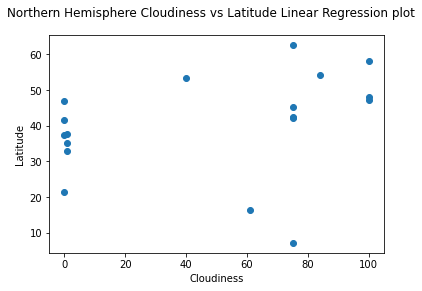

In [37]:
plt.scatter(weather_df['Cloudiness'][NorthernIndexes],weather_df['Latitude'][NorthernIndexes])
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.suptitle("Northern Hemisphere Cloudiness vs Latitude Linear Regression plot")


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_df['Cloudiness'][NorthernIndexes], 
                                            weather_df['Latitude'][NorthernIndexes])

regress_values = weather_df['Cloudiness'][NorthernIndexes] * slope + intercept
print(regress_values)


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


print(line_eq)

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

1   -41.47
7    -4.03
Name: Cloudiness, dtype: float64
y = -0.42x +-4.03


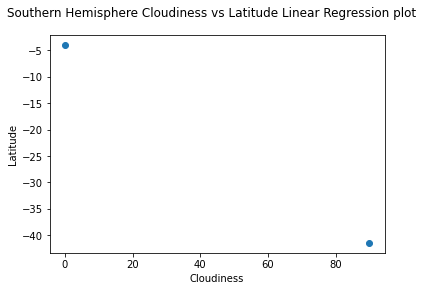

In [38]:
plt.scatter(weather_df['Cloudiness'][SouthernIndexes],weather_df['Latitude'][SouthernIndexes])
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.suptitle("Southern Hemisphere Cloudiness vs Latitude Linear Regression plot")


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_df['Cloudiness'][SouthernIndexes], 
                                            weather_df['Latitude'][SouthernIndexes])

regress_values = weather_df['Cloudiness'][SouthernIndexes] * slope + intercept
print(regress_values)

 
 
if math.isnan(slope):
    equation3 = str(weather_df['Temperature'][SouthernIndexes])
    equation3 = equation3.split(" ")
    print(equation3)
    print(f"x = {equation3[4]}")
else:
    regress_values = weather_df['Temperature'][SouthernIndexes] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0     40.842366
2     40.495743
3     40.471630
4     40.577555
5     40.495743
6     40.524592
8     40.466248
9     40.838491
10    40.563991
11    40.524592
12    40.460865
13    40.436968
14    40.697904
15    40.554303
16    40.620829
17    40.627072
18    40.484978
19    40.746130
Name: Wind Speed, dtype: float64
y = 0.02x +40.42


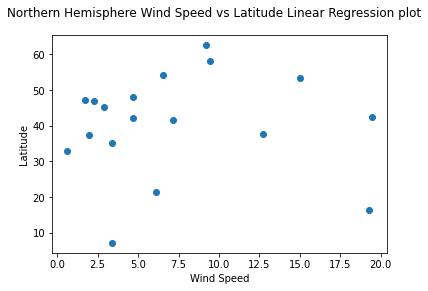

In [39]:
plt.scatter(weather_df['Wind Speed'][NorthernIndexes],weather_df['Latitude'][NorthernIndexes])
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.suptitle("Northern Hemisphere Wind Speed vs Latitude Linear Regression plot")


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_df['Wind Speed'][NorthernIndexes], 
                                            weather_df['Latitude'][NorthernIndexes])

regress_values = weather_df['Wind Speed'][NorthernIndexes] * slope + intercept
print(regress_values)


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 6.43x +-100.46


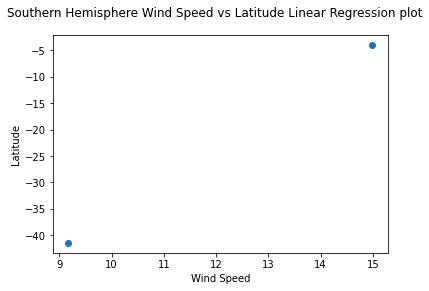

In [40]:
plt.scatter(weather_df['Wind Speed'][SouthernIndexes],weather_df['Latitude'][SouthernIndexes])
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.suptitle("Southern Hemisphere Wind Speed vs Latitude Linear Regression plot")


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_df['Wind Speed'][SouthernIndexes], 
                                            weather_df['Latitude'][SouthernIndexes])

if math.isnan(slope):
    equation4 = str(weather_df['Temperature'][SouthernIndexes])
    equation4 = equation4.split(" ")
    print(equation4)
    print(f"x = {equation4[4]}")
else:
    regress_values = weather_df['Temperature'][SouthernIndexes] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)
plt.show()